In [1]:
import pandas as pd

In [2]:
raw_data_21= pd.read_csv("adult_21.csv")

In [3]:
raw_data_21.sample(5)

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
1008,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,5114.296,H048439,1.98
2548,1,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,2,10,1,7278.018,H001546,3.19
28232,3,11,0,2021.0,2.0,2021.0,9.0,NaN,3.0,1.0,...,NaN,NaN,1,1,12,10,1,2715.162,H043725,3.62
5371,3,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,3,10,1,6415.865,H003781,11.00
2612,2,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,2,10,1,6651.651,H056362,3.34


In [4]:
raw_data_21.head()

,URBRRL,RATCAT_A,IMPINCFLG_A,CVDVAC2YR_A,CVDVAC2MR_A,CVDVAC1YR_A,CVDVAC1MR_A,SHTCVD19AV_A,SHTCVD19NM_A,SHTCVD19_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,4,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,5423.324,H056808,1.93
1,4,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3832.196,H018779,4.45
2,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,3422.661,H049265,5.94
3,3,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,12960.165,H007699,3.70
4,1,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,9284.618,H066034,1.66


In [5]:
columns = raw_data_21.columns.sort_values()

In [6]:
p_columns = [i for i in columns if i.startswith("PRO")]

In [7]:
raw_data_21[p_columns].notnull().sum()

PROSTAGETC_A     445
PROSTCAN_A      1546
PROXYREL_A       582
PROXY_A          587
dtype: int64

In [8]:
raw_data_21[raw_data_21["PROSTCAN_A"].notnull()]["PROSTCAN_A"].value_counts()

2.0    1091
1.0     445
9.0       8
7.0       2
Name: PROSTCAN_A, dtype: int64

In [9]:
prostate_cancer_raw_21 = raw_data_21[raw_data_21["PROSTCAN_A"].notnull()]

In [10]:
prostate_cancer_raw_21.shape

(1546, 622)

Age variable strucrure

In [11]:
age_columns = [i for i in columns if i.startswith("AGE")]

In [12]:
prostate_cancer_raw_21[age_columns].isna().mean()

AGE65     0.998706
AGEP_A    0.000000
dtype: float64

In [13]:
prostate_cancer_raw_21["AGEP_A"].isna().mean() * 100

0.0

BMI strucrure

In [14]:
bmi_columns = [i for i in columns if i.startswith("BMI")]

In [15]:
bmi_columns

['BMICAT_A']

In [16]:
prostate_cancer_raw_21[bmi_columns].isna().mean()

BMICAT_A    0.0
dtype: float64

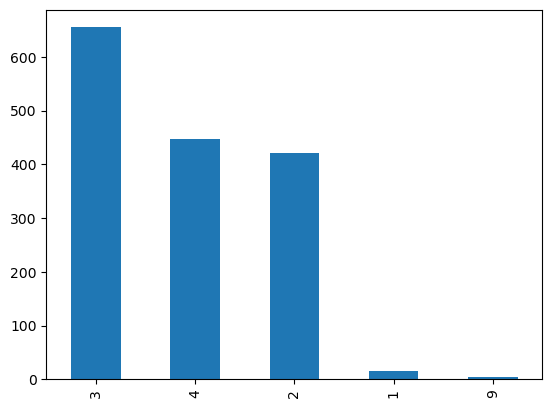

In [17]:
prostate_cancer_raw_21['BMICAT_A'].value_counts().plot(kind='bar');

More Data eXPLORATION, based on missing values

In [18]:
# Calculate the percentage of missing values for each column.
missing_percentage = prostate_cancer_raw_21.isna().mean()
missing_pct = 0.2

# Filter columns with less than 30% missing values.
columns_with_less_than_30_percent_missing = missing_percentage[missing_percentage < missing_pct].index
len_missing = len(columns_with_less_than_30_percent_missing)
print(f"number of columns with less than {missing_pct * 100}% missing: {len_missing} \n")
# List the variable names with less than 30% missing values.
for column_name in columns_with_less_than_30_percent_missing:
    print(column_name)

number of columns with less than 20.0% missing: 244 

URBRRL
RATCAT_A
IMPINCFLG_A
PPSU
PSTRAT
HISPALLP_A
RACEALLP_A
DISAB3_A
K6SPD_A
CITZNSTP_A
LEGMSTAT_A
MARSTAT_A
PCNTADTWFP_A
PCNTADTWKP_A
FDSCAT4_A
FDSCAT3_A
EMPWRKLSW1_A
SMKECIGST_A
SMKCIGST_A
BMICAT_A
WEIGHTLBTC_A
HEIGHTTC_A
URGNT12MTC_A
EMERG12MTC_A
PCNT18UPTC
PCNTLT18TC
LSATIS4R_A
LSATIS11R_A
NOTCOV_A
OTHGOV_A
OTHPUB_A
IHS_A
MILITARY_A
CHIP_A
MEDICAID_A
MEDICARE_A
PRIVATE_A
EDUCP_A
MAXEDUCP_A
PARSTAT_A
SAPARENTSC_A
MLTFAMFLG_A
OVER65FLG_A
PCNTADLT_A
PCNTKIDS_A
NUMCAN_A
OTHERCANP_A
COLRCCAN_A
HDNCKCAN_A
THYROCAN_A
THROACAN_A
STOMACAN_A
SKNDKCAN_A
SKNNMCAN_A
SKNMCAN_A
RECTUCAN_A
PROSTCAN_A
PANCRCAN_A
MOUTHCAN_A
MELANCAN_A
LYMPHCAN_A
LUNGCAN_A
LIVERCAN_A
LEUKECAN_A
LARYNCAN_A
GALLBCAN_A
ESOPHCAN_A
COLONCAN_A
BREASCAN_A
BRAINCAN_A
BONECAN_A
BLOODCAN_A
BLADDCAN_A
HISDETP_A
HISP_A
REGION
INTV_QRT
SRVY_YR
SEX_A
AGEP_A
ASTATNEW
HOUTENURE_A
HOUYRSLIV_A
FDSBALANCE_A
FDSLAST_A
FDSRUNOUT_A
FSNAP12M_A
INCOTHR_A
INCRETIRE_A
INCWELF_A
INCSSISSD

In [19]:
#no missing values
columns_with_no_missing_values = missing_percentage[missing_percentage == 0].index
print(len(columns_with_no_missing_values))
# List the variable names with no missing values.
for column_name in columns_with_no_missing_values:
    print(column_name)


216
URBRRL
RATCAT_A
IMPINCFLG_A
PPSU
PSTRAT
HISPALLP_A
RACEALLP_A
DISAB3_A
K6SPD_A
CITZNSTP_A
LEGMSTAT_A
MARSTAT_A
PCNTADTWFP_A
PCNTADTWKP_A
FDSCAT4_A
FDSCAT3_A
EMPWRKLSW1_A
SMKECIGST_A
SMKCIGST_A
BMICAT_A
WEIGHTLBTC_A
HEIGHTTC_A
URGNT12MTC_A
EMERG12MTC_A
PCNT18UPTC
PCNTLT18TC
LSATIS4R_A
LSATIS11R_A
NOTCOV_A
OTHGOV_A
OTHPUB_A
IHS_A
MILITARY_A
CHIP_A
MEDICAID_A
MEDICARE_A
PRIVATE_A
EDUCP_A
PARSTAT_A
SAPARENTSC_A
MLTFAMFLG_A
OVER65FLG_A
PCNTADLT_A
PCNTKIDS_A
NUMCAN_A
OTHERCANP_A
COLRCCAN_A
HDNCKCAN_A
THYROCAN_A
THROACAN_A
STOMACAN_A
SKNDKCAN_A
SKNNMCAN_A
SKNMCAN_A
RECTUCAN_A
PROSTCAN_A
PANCRCAN_A
MOUTHCAN_A
MELANCAN_A
LYMPHCAN_A
LUNGCAN_A
LIVERCAN_A
LEUKECAN_A
LARYNCAN_A
GALLBCAN_A
ESOPHCAN_A
COLONCAN_A
BREASCAN_A
BRAINCAN_A
BONECAN_A
BLOODCAN_A
BLADDCAN_A
HISDETP_A
HISP_A
REGION
INTV_QRT
SRVY_YR
SEX_A
AGEP_A
ASTATNEW
HOUTENURE_A
HOUYRSLIV_A
FDSBALANCE_A
FDSLAST_A
FDSRUNOUT_A
FSNAP12M_A
INCINTER_A
INCWRKO_A
SCHCURENR_A
NATUSBORN_A
AFVET_A
MARITAL_A
ORIENT_A
CMPSUPPORT_A
SUPPORT_A
SMOKELS

## REQUIRED VARIABLES

In [20]:
# Specify the columns you want to select.
required_columns = ['AGEP_A', 'BMICAT_A', 'DIBEV_A', 'SMKEV_A', 'SMKCIGST_A','CHLEV_A', 'ECIGEV_A', 'SMKECIGST_A',
                    'COPDEV_A', 'ASEV_A', 'SASPPHISP_A', 'HYPEV_A', 'CHDEV_A', 'STREV_A', 'BREASCAN_A','SEX_A','PROSTCAN_A',
                   'HISPALLP_A', 'HISDETP_A', 'RACEALLP_A', 'EDUCP_A', 'URBRRL', 'K6SPD_A', 'EMDWRKCAT1_A', 'FDSBALANCE_A',
                   'FDSLESS_A', 'FDSHUNGRY_A', 'FDSWEIGHT_A', 'HOUTENURE_A', 'POVRATTC_A', 'FDSRUNOUT_A', 'FDSLAST_A', 
                    'HISP_A']

# Create a new DataFrame with the selected columns.
prostate_cancer_required_columns_21 = prostate_cancer_raw_21[required_columns]
prostate_cancer_required_columns_21.isna().mean()

AGEP_A          0.000000
BMICAT_A        0.000000
DIBEV_A         0.000000
SMKEV_A         0.000000
SMKCIGST_A      0.000000
CHLEV_A         0.000000
ECIGEV_A        0.000000
SMKECIGST_A     0.000000
COPDEV_A        0.000000
ASEV_A          0.000000
SASPPHISP_A     0.408797
HYPEV_A         0.000000
CHDEV_A         0.000000
STREV_A         0.000000
BREASCAN_A      0.000000
SEX_A           0.000000
PROSTCAN_A      0.000000
HISPALLP_A      0.000000
HISDETP_A       0.000000
RACEALLP_A      0.000000
EDUCP_A         0.000000
URBRRL          0.000000
K6SPD_A         0.000000
EMDWRKCAT1_A    0.626779
FDSBALANCE_A    0.000000
FDSLESS_A       0.935964
FDSHUNGRY_A     0.935964
FDSWEIGHT_A     0.935964
HOUTENURE_A     0.000000
POVRATTC_A      0.000000
FDSRUNOUT_A     0.000000
FDSLAST_A       0.000000
HISP_A          0.000000
dtype: float64

In [21]:
prostate_cancer_required_columns_21["BREASCAN_A"].value_counts()

2.0    1532
9.0       8
1.0       4
7.0       2
Name: BREASCAN_A, dtype: int64

In [22]:
prostate_cancer_required_columns_21["SEX_A"].value_counts()

1    1546
Name: SEX_A, dtype: int64

In [23]:
import seaborn as sns

## CONVERTING BREASCAN AND PROSTATE CANCER DATATYPES TO CATEGORICAL VARAIABLES

In [24]:
prostate_cancer_required_columns_21 = prostate_cancer_required_columns_21.astype({"PROSTCAN_A":'category', "BREASCAN_A":"category"})

In [25]:
columns_to_exclude = ["AGEP_P"]

# Get a list of columns to convert to categorical data type
columns_to_convert = [col for col in prostate_cancer_required_columns_21.columns if col not in columns_to_exclude]

# Convert the selected columns to categorical data type
prostate_cancer_required_columns_21[columns_to_convert] = prostate_cancer_required_columns_21[columns_to_convert].astype("category")


In [26]:
prostate_cancer_required_columns_21.dtypes

AGEP_A          category
BMICAT_A        category
DIBEV_A         category
SMKEV_A         category
SMKCIGST_A      category
CHLEV_A         category
ECIGEV_A        category
SMKECIGST_A     category
COPDEV_A        category
ASEV_A          category
SASPPHISP_A     category
HYPEV_A         category
CHDEV_A         category
STREV_A         category
BREASCAN_A      category
SEX_A           category
PROSTCAN_A      category
HISPALLP_A      category
HISDETP_A       category
RACEALLP_A      category
EDUCP_A         category
URBRRL          category
K6SPD_A         category
EMDWRKCAT1_A    category
FDSBALANCE_A    category
FDSLESS_A       category
FDSHUNGRY_A     category
FDSWEIGHT_A     category
HOUTENURE_A     category
POVRATTC_A      category
FDSRUNOUT_A     category
FDSLAST_A       category
HISP_A          category
dtype: object

In [27]:
prostate_cancer_required_columns_21.dtypes

AGEP_A          category
BMICAT_A        category
DIBEV_A         category
SMKEV_A         category
SMKCIGST_A      category
CHLEV_A         category
ECIGEV_A        category
SMKECIGST_A     category
COPDEV_A        category
ASEV_A          category
SASPPHISP_A     category
HYPEV_A         category
CHDEV_A         category
STREV_A         category
BREASCAN_A      category
SEX_A           category
PROSTCAN_A      category
HISPALLP_A      category
HISDETP_A       category
RACEALLP_A      category
EDUCP_A         category
URBRRL          category
K6SPD_A         category
EMDWRKCAT1_A    category
FDSBALANCE_A    category
FDSLESS_A       category
FDSHUNGRY_A     category
FDSWEIGHT_A     category
HOUTENURE_A     category
POVRATTC_A      category
FDSRUNOUT_A     category
FDSLAST_A       category
HISP_A          category
dtype: object

## Converting "AGEP_A" back to numerical


In [28]:
prostate_cancer_required_columns_21 = prostate_cancer_required_columns_21.astype({"AGEP_A":'int64'})

In [29]:
prostate_cancer_required_columns_21.dtypes

AGEP_A             int64
BMICAT_A        category
DIBEV_A         category
SMKEV_A         category
SMKCIGST_A      category
CHLEV_A         category
ECIGEV_A        category
SMKECIGST_A     category
COPDEV_A        category
ASEV_A          category
SASPPHISP_A     category
HYPEV_A         category
CHDEV_A         category
STREV_A         category
BREASCAN_A      category
SEX_A           category
PROSTCAN_A      category
HISPALLP_A      category
HISDETP_A       category
RACEALLP_A      category
EDUCP_A         category
URBRRL          category
K6SPD_A         category
EMDWRKCAT1_A    category
FDSBALANCE_A    category
FDSLESS_A       category
FDSHUNGRY_A     category
FDSWEIGHT_A     category
HOUTENURE_A     category
POVRATTC_A      category
FDSRUNOUT_A     category
FDSLAST_A       category
HISP_A          category
dtype: object

## Categorical plots (Facet Grid)

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureW

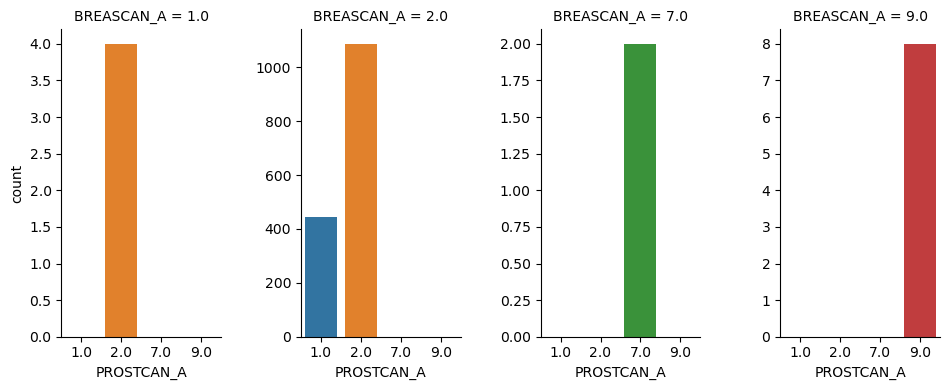

In [30]:
import seaborn as sns
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="BREASCAN_A",
    kind="count", height=4, aspect=0.6,sharey=False
);

In [31]:
pd.crosstab(prostate_cancer_required_columns_21.BREASCAN_A, prostate_cancer_required_columns_21.PROSTCAN_A, margins=True)

PROSTCAN_A,1.0,2.0,7.0,9.0,All
BREASCAN_A,,,,,
1.0,0,4,0,0,4
2.0,445,1087,0,0,1532
7.0,0,0,2,0,2
9.0,0,0,0,8,8
All,445,1091,2,8,1546


## FURTHER ANAYSES FOR PROSCAN AND OTHER VARIABLES

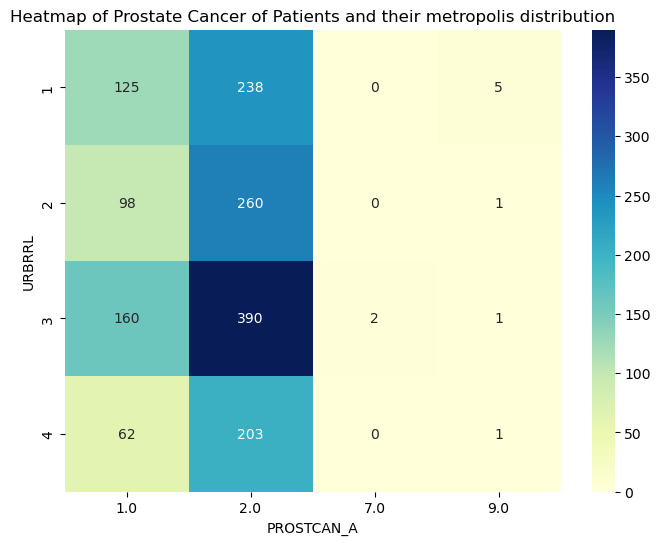

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'prostate_cancer_required_columns_21' is your DataFrame
data = prostate_cancer_required_columns_21

# Create a contingency table
contingency_table = pd.crosstab(data['URBRRL'], data['PROSTCAN_A'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Prostate Cancer of Patients and their metropolis distribution')
plt.xlabel('PROSTCAN_A')
plt.ylabel('URBRRL')

# Show the heatmap
plt.show()


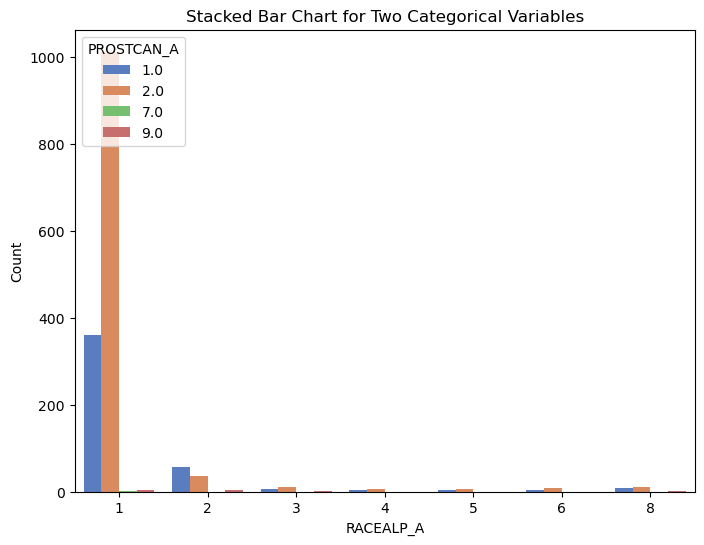

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
data = prostate_cancer_required_columns_21

# Create a stacked bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='RACEALLP_A', hue='PROSTCAN_A', data= prostate_cancer_required_columns_21, palette='muted')

# Add labels and title
plt.xlabel('RACEALP_A')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Two Categorical Variables')

# Show the plot
plt.show()







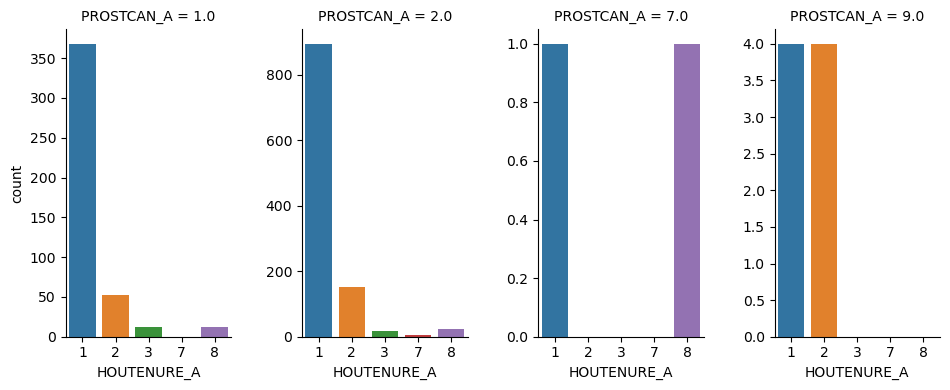

In [34]:
# Pair plot of Patients and their house ownership

import seaborn as sns
sns.catplot(
    data=prostate_cancer_required_columns_21, x="HOUTENURE_A", col="PROSTCAN_A",
    kind="count", height=4, aspect=0.6,sharey=False
);

In [35]:
pd.crosstab(prostate_cancer_required_columns_21.HOUTENURE_A, prostate_cancer_required_columns_21.PROSTCAN_A, margins=True)

PROSTCAN_A,1.0,2.0,7.0,9.0,All
HOUTENURE_A,,,,,
1,368,894,1,4,1267
2,53,152,0,4,209
3,12,16,0,0,28
7,0,4,0,0,4
8,12,25,1,0,38
All,445,1091,2,8,1546


In [36]:
#pair plot of single or multiple race groups
pd.crosstab(prostate_cancer_required_columns_21.RACEALLP_A, prostate_cancer_required_columns_21.PROSTCAN_A, margins=True)

PROSTCAN_A,1.0,2.0,7.0,9.0,All
RACEALLP_A,,,,,
1,361,1011,2,3,1377
2,57,37,0,3,97
3,7,11,0,1,19
4,3,6,0,0,9
5,5,7,0,0,12
6,3,8,0,0,11
8,9,11,0,1,21
All,445,1091,2,8,1546


In [37]:
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.RACEALLP_A, margins=True)

RACEALLP_A,1,2,3,4,5,6,8,All
PROSTCAN_A,,,,,,,,
1.0,361,57,7,3,5,3,9,445
2.0,1011,37,11,6,7,8,11,1091
7.0,2,0,0,0,0,0,0,2
9.0,3,3,1,0,0,0,1,8
All,1377,97,19,9,12,11,21,1546


In [38]:
# pair plot of level of education
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.EDUCP_A, margins=True)

EDUCP_A,1,2,3,4,5,6,7,8,9,10,97,99,All
PROSTCAN_A,,,,,,,,,,,,,
1.0,38,7,8,91,60,14,30,108,52,34,1,2,445
2.0,62,14,16,238,161,43,73,238,162,83,1,0,1091
7.0,0,0,0,1,1,0,0,0,0,0,0,0,2
9.0,3,1,2,1,0,0,0,1,0,0,0,0,8
All,103,22,26,331,222,57,103,347,214,117,2,2,1546


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureW

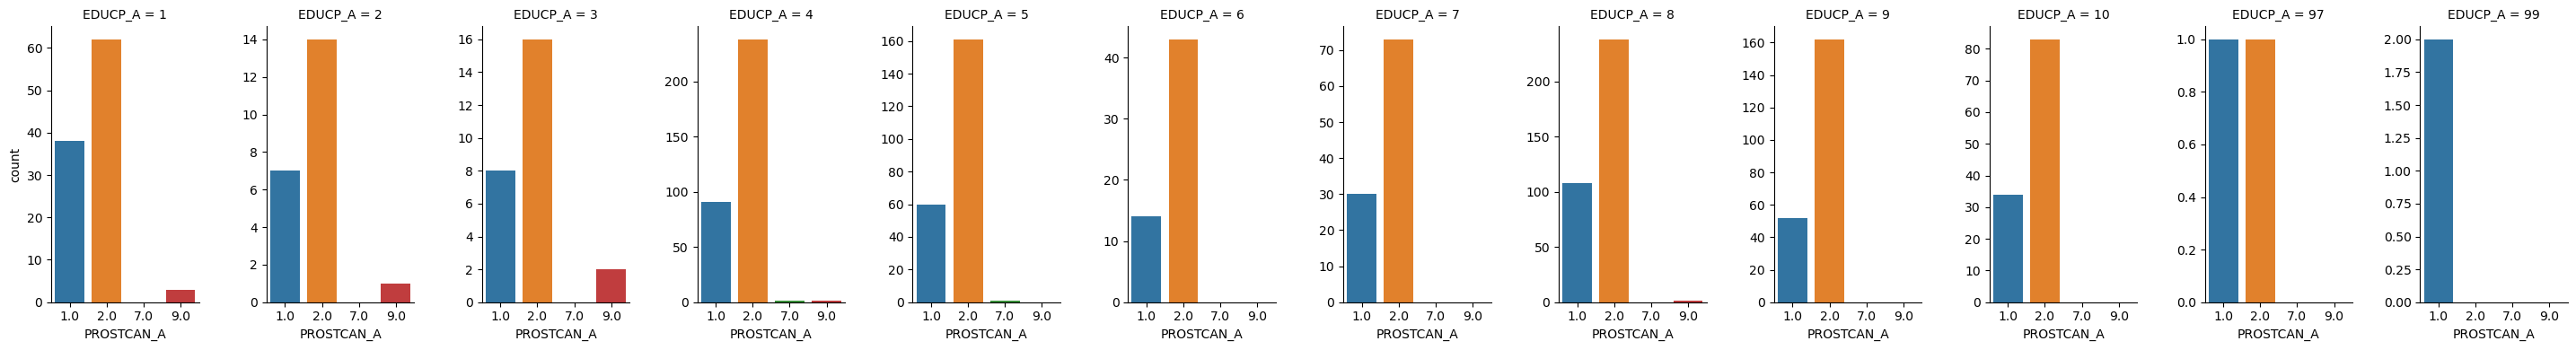

In [39]:
import seaborn as sns
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="EDUCP_A",
    kind="count", height=4, aspect=0.6,sharey=False
);

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureW

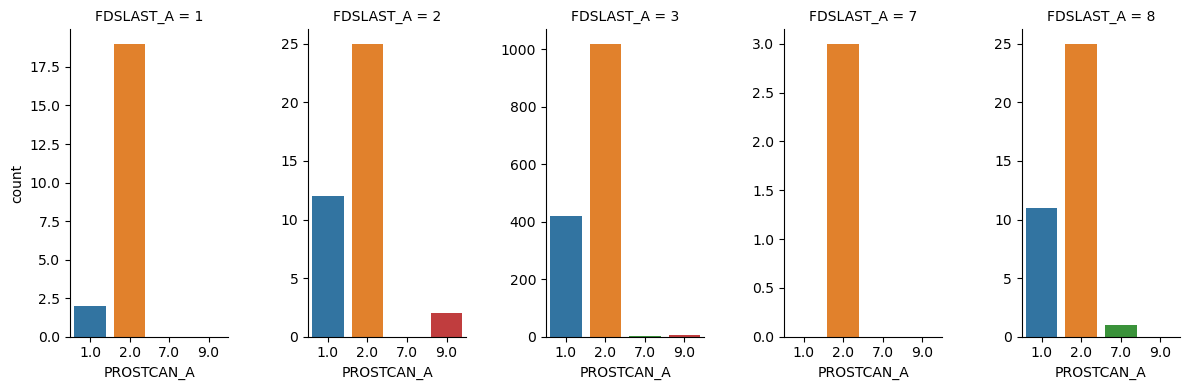

In [40]:
import seaborn as sns
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="FDSLAST_A",
    kind="count", height=4, aspect=0.6,sharey=False
);

In [41]:
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.FDSLAST_A, margins=True)

FDSLAST_A,1,2,3,7,8,All
PROSTCAN_A,,,,,,
1.0,2,12,420,0,11,445
2.0,19,25,1019,3,25,1091
7.0,0,0,1,0,1,2
9.0,0,2,6,0,0,8
All,21,39,1446,3,37,1546


In [42]:
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.URBRRL, margins=True)

URBRRL,1,2,3,4,All
PROSTCAN_A,,,,,
1.0,125,98,160,62,445
2.0,238,260,390,203,1091
7.0,0,0,2,0,2
9.0,5,1,1,1,8
All,368,359,553,266,1546


In [43]:
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.K6SPD_A, margins=True)

K6SPD_A,1,2,8,All
PROSTCAN_A,,,,
1.0,8,423,14,445
2.0,33,1033,25,1091
7.0,0,1,1,2
9.0,2,5,1,8
All,43,1462,41,1546


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


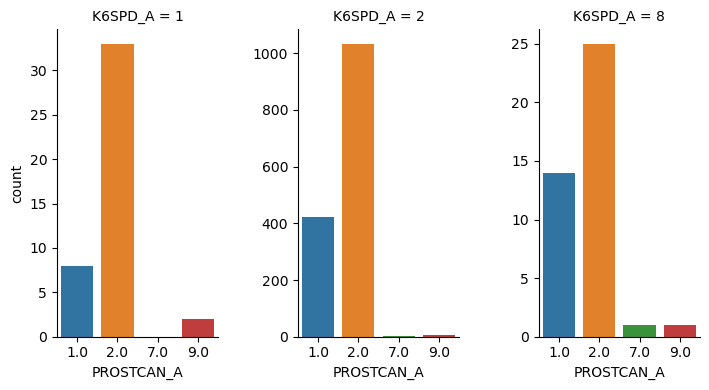

In [44]:
import seaborn as sns
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="K6SPD_A",
    kind="count", height=4, aspect=0.6,sharey=False
);

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureW

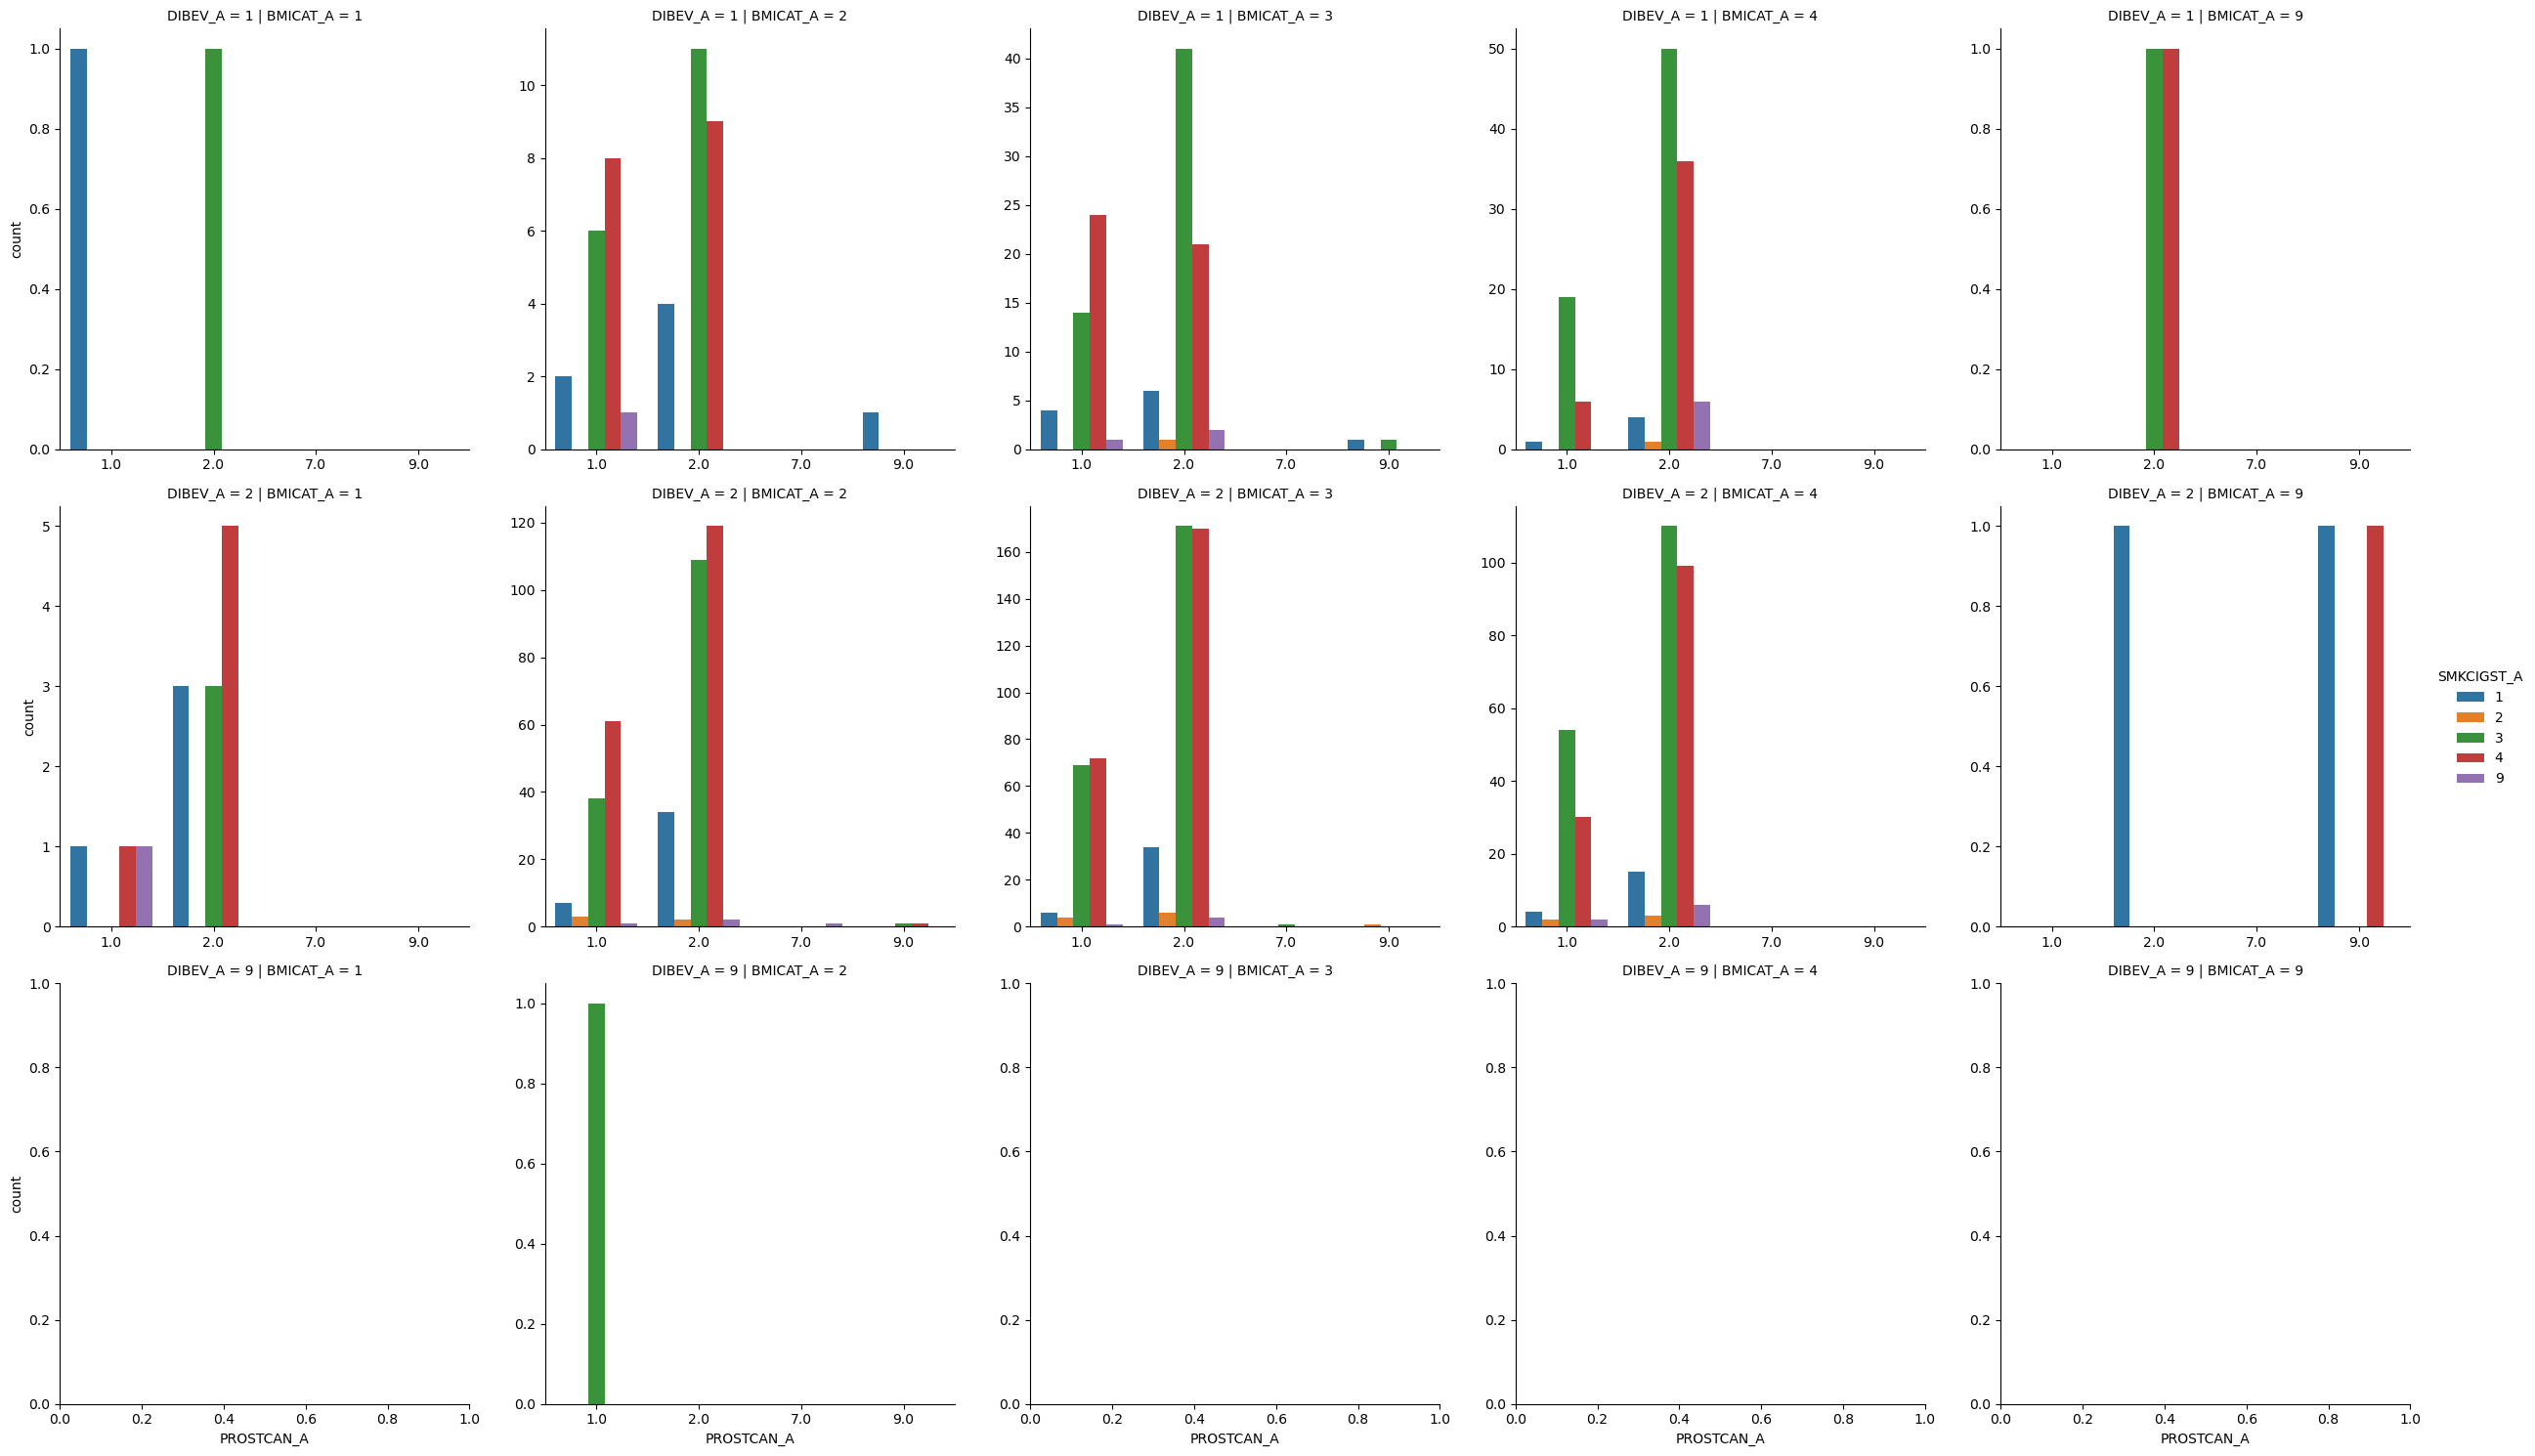

In [45]:
sns.catplot(
    data=prostate_cancer_required_columns_21,
    x="PROSTCAN_A",   # X-axis variable
    col="BMICAT_A",  # Column variable
    row="DIBEV_A",  # Row variable
    hue="SMKCIGST_A",  # Fourth variable (distinguishes data points)
    kind="count", sharex= False, sharey=False
);


## Further exploration on men having breast cancer
https://www.nhs.uk/conditions/breast-cancer-in-men/

In [46]:
import seaborn as sns

# Specify the file path for the new CSV file.
new_file_path = 'prostate_cancer_required_columns_21.csv'

# Save the new DataFrame to a new CSV file.
prostate_cancer_required_columns_21.to_csv(new_file_path, index=False)

print(f"New dataset has been saved to '{new_file_path}'")


New dataset has been saved to 'prostate_cancer_required_columns_21.csv'


## VARIABLES EDA

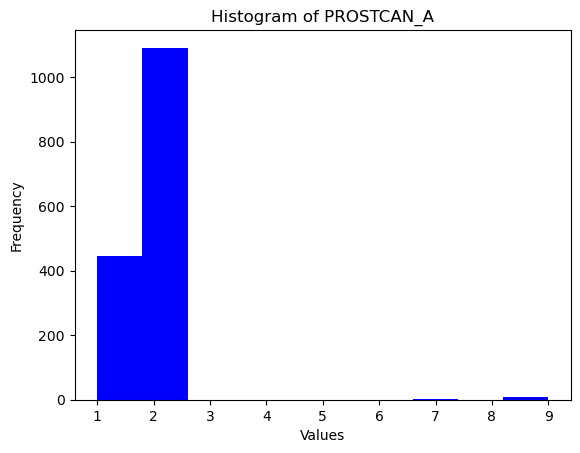

In [47]:
import matplotlib.pyplot as plt

plt.hist(prostate_cancer_required_columns_21['PROSTCAN_A'], bins=10, color='blue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of PROSTCAN_A')
plt.show()


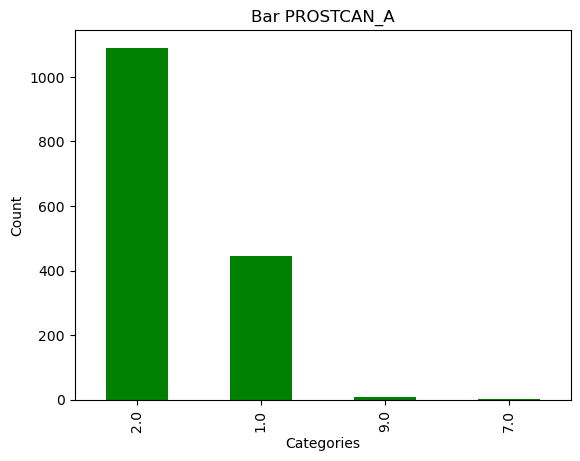

In [48]:
import matplotlib.pyplot as plt

# Assuming 'column_name' is the name of the column you want to plot
value_counts = prostate_cancer_required_columns_21['PROSTCAN_A'].value_counts()
value_counts.plot(kind='bar', color='green')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar PROSTCAN_A')
plt.show()


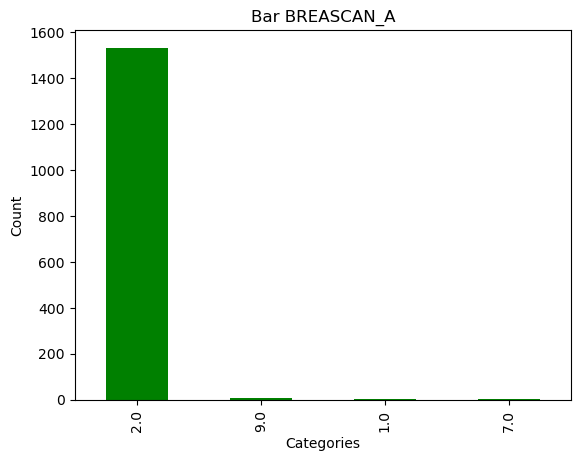

In [49]:
import matplotlib.pyplot as plt

# Assuming 'column_name' is the name of the column you want to plot
value_counts = prostate_cancer_required_columns_21['BREASCAN_A'].value_counts()
value_counts.plot(kind='bar', color='green')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar BREASCAN_A')
plt.show()

## Facet plots 
facet grid plots for categorical and numeric data 

In [50]:
prostate_cancer_required_columns_21.dtypes

AGEP_A             int64
BMICAT_A        category
DIBEV_A         category
SMKEV_A         category
SMKCIGST_A      category
CHLEV_A         category
ECIGEV_A        category
SMKECIGST_A     category
COPDEV_A        category
ASEV_A          category
SASPPHISP_A     category
HYPEV_A         category
CHDEV_A         category
STREV_A         category
BREASCAN_A      category
SEX_A           category
PROSTCAN_A      category
HISPALLP_A      category
HISDETP_A       category
RACEALLP_A      category
EDUCP_A         category
URBRRL          category
K6SPD_A         category
EMDWRKCAT1_A    category
FDSBALANCE_A    category
FDSLESS_A       category
FDSHUNGRY_A     category
FDSWEIGHT_A     category
HOUTENURE_A     category
POVRATTC_A      category
FDSRUNOUT_A     category
FDSLAST_A       category
HISP_A          category
dtype: object

In [51]:
prostate_cancer_required_columns_21.describe()

,AGEP_A
count,1546.000000
mean,69.248383
std,12.235463
min,18.000000
25%,63.000000
50%,71.000000
75%,78.000000
max,97.000000


### To do 
1. remove columns with 0 variance/std
2. Do more EDA and see how target variable distribution changes for each column
3. For numeric cols, check their distrributions (boxplot, violin plots) with different valus of the target variable
3. also check how numeric cols varies with one another for every value of the target variable.
4. do pairplot for all of the numeric columns

<AxesSubplot:>

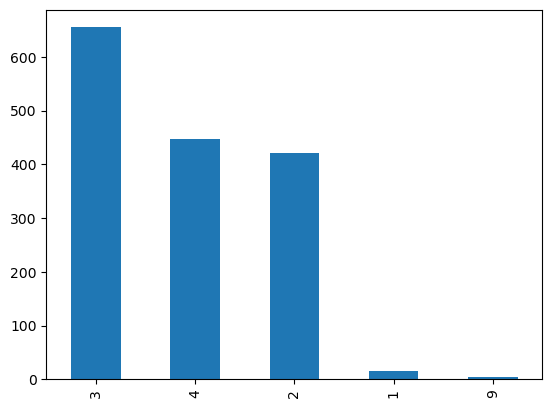

In [52]:
prostate_cancer_required_columns_21.BMICAT_A.value_counts().plot(kind="bar")

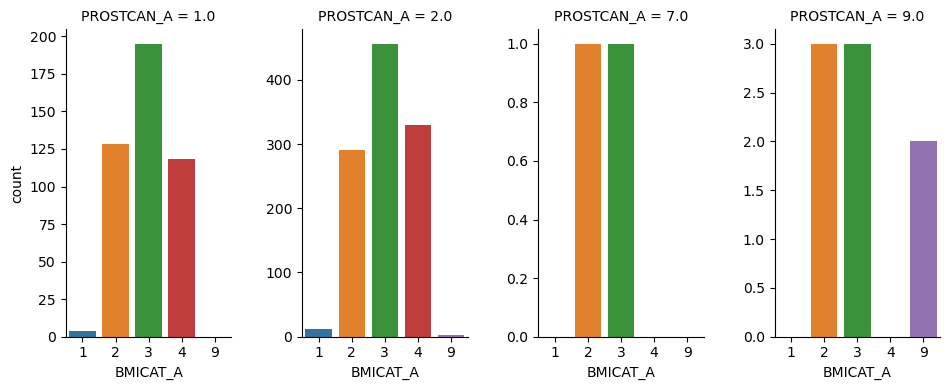

In [53]:
sns.catplot(
    data=prostate_cancer_required_columns_21, col="PROSTCAN_A", x="BMICAT_A",
    kind="count", height=4, aspect=.6,sharey=False
);


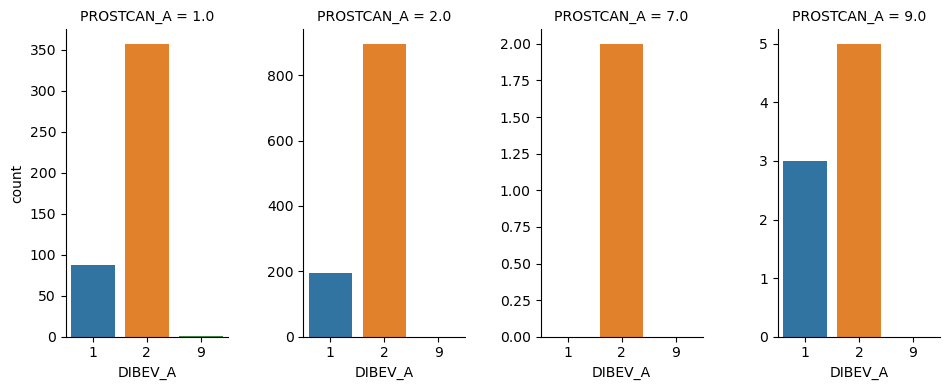

In [54]:
sns.catplot(
    data=prostate_cancer_required_columns_21, col="PROSTCAN_A", x="DIBEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);
# percentage plots

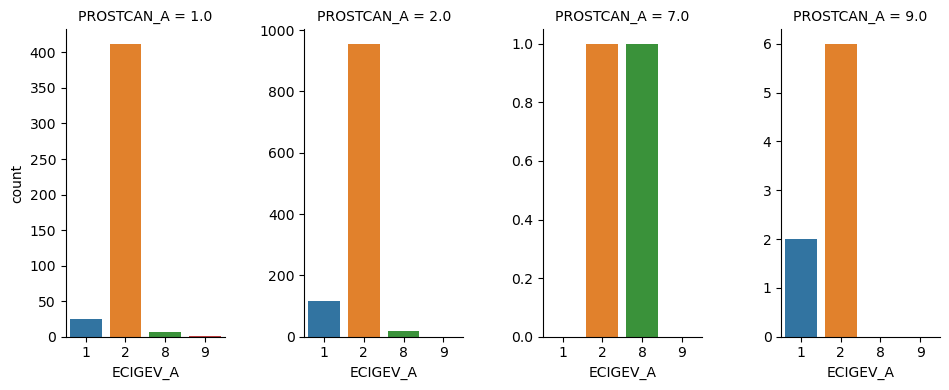

In [55]:
# HISTORY OF ELECTRONIC CIGARETTE
sns.catplot(
    data=prostate_cancer_required_columns_21, col="PROSTCAN_A", x="ECIGEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);


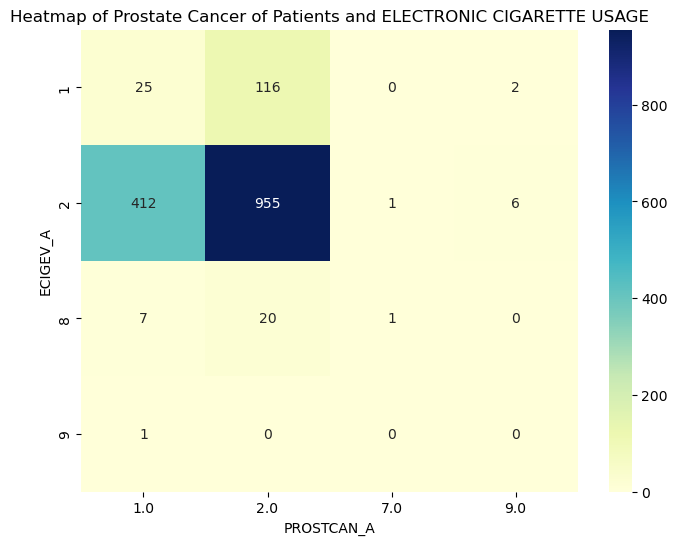

In [56]:
# Assuming 'prostate_cancer_required_columns_21' is your DataFrame
data = prostate_cancer_required_columns_21

# Create a contingency table
contingency_table = pd.crosstab(data['ECIGEV_A'], data['PROSTCAN_A'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Prostate Cancer of Patients and ELECTRONIC CIGARETTE USAGE')
plt.xlabel('PROSTCAN_A')
plt.ylabel('ECIGEV_A')

# Show the heatmap
plt.show()


In [57]:
pd.crosstab(prostate_cancer_required_columns_21.PROSTCAN_A, prostate_cancer_required_columns_21.ECIGEV_A, margins=True)

ECIGEV_A,1,2,8,9,All
PROSTCAN_A,,,,,
1.0,25,412,7,1,445
2.0,116,955,20,0,1091
7.0,0,1,1,0,2
9.0,2,6,0,0,8
All,143,1374,28,1,1546


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


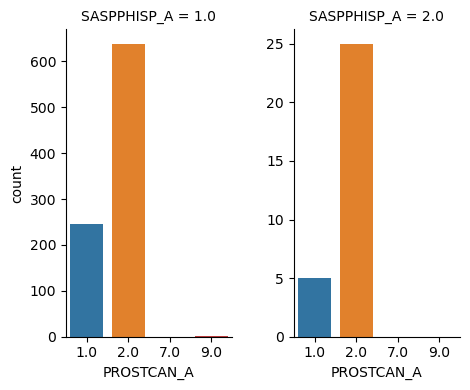

In [58]:
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="SASPPHISP_A",
    kind="count", height=4, aspect=.6,sharey=False
);


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


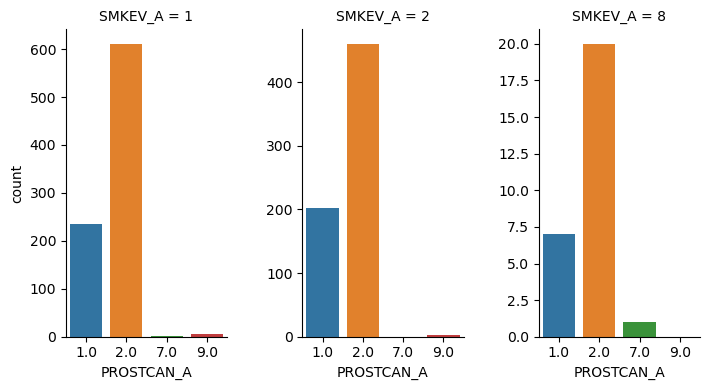

In [59]:
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="SMKEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


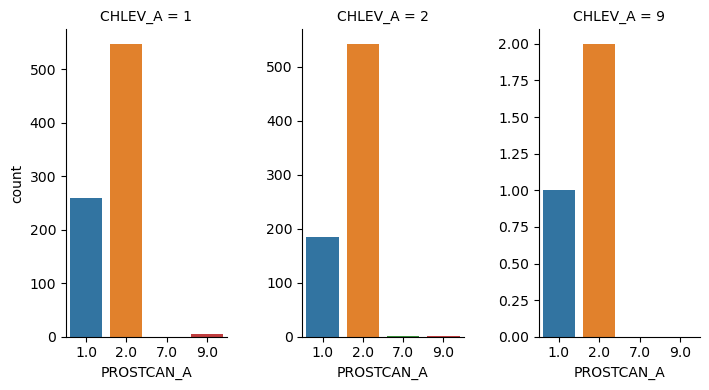

In [60]:
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="CHLEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);



C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


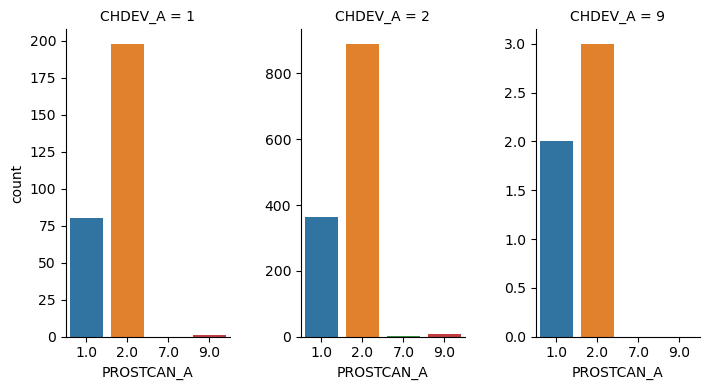

In [61]:
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="CHDEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


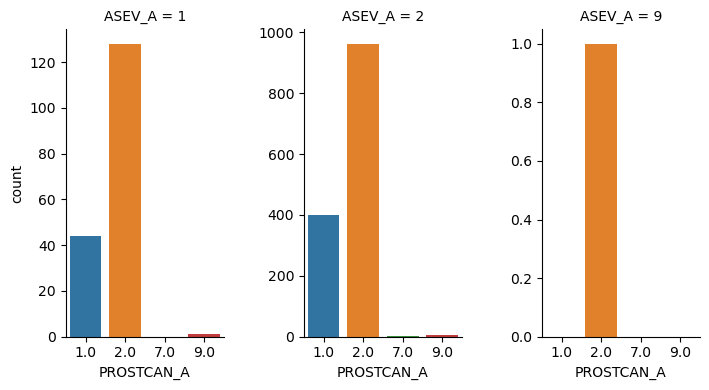

In [62]:
sns.catplot(
    data=prostate_cancer_required_columns_21, x="PROSTCAN_A", col="ASEV_A",
    kind="count", height=4, aspect=.6,sharey=False
);


## Violin plot for age and prostate cancer status

C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


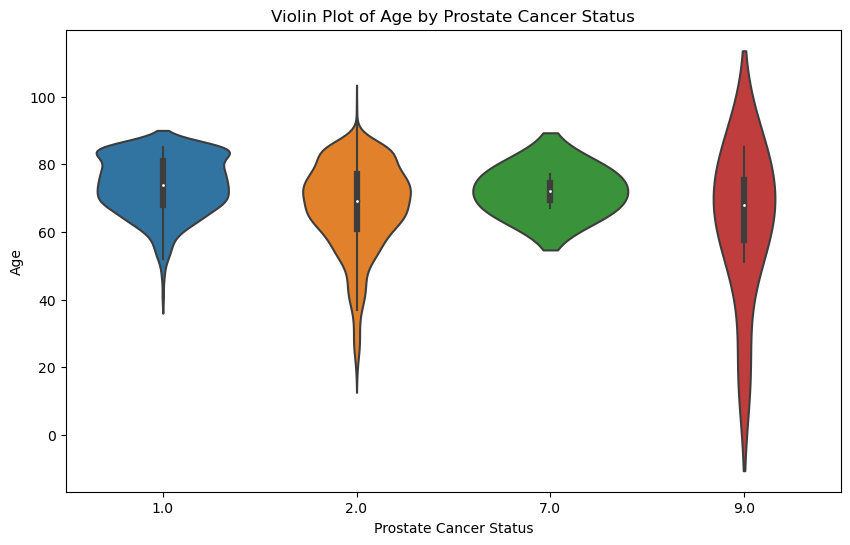

In [63]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.violinplot(data=prostate_cancer_required_columns_21, x="PROSTCAN_A", y="AGEP_A")
plt.title("Violin Plot of Age by Prostate Cancer Status")
plt.xlabel("Prostate Cancer Status")
plt.ylabel("Age")
plt.show()


C:\Users\HP 10th Gen\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


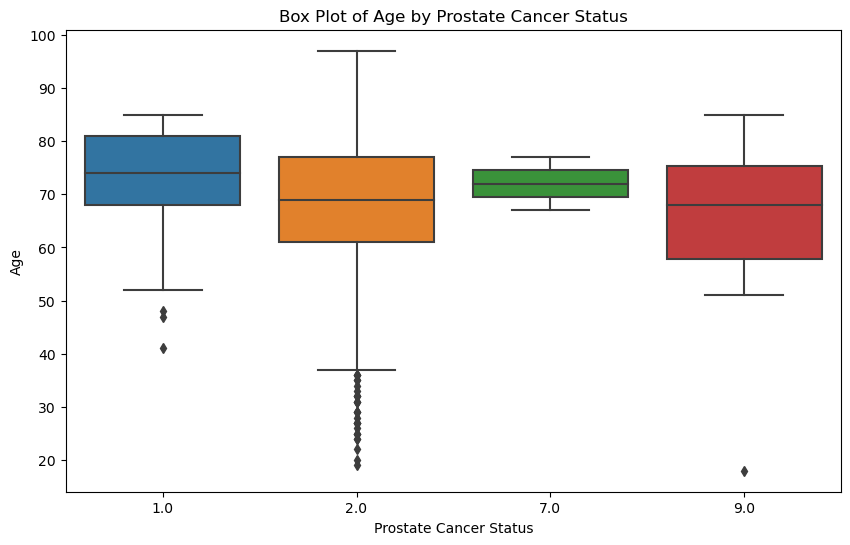

In [64]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(data=prostate_cancer_required_columns_21, x="PROSTCAN_A", y="AGEP_A")
plt.title("Box Plot of Age by Prostate Cancer Status")
plt.xlabel("Prostate Cancer Status")
plt.ylabel("Age")
plt.show()


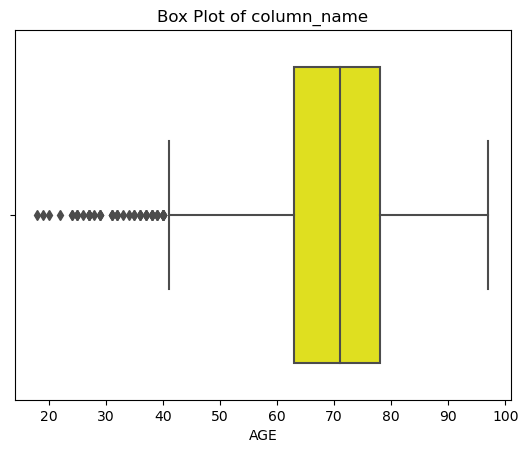

In [65]:
# Assuming 'column_name' is the name of the column you want to plot
sns.boxplot(data=prostate_cancer_required_columns_21, x='AGEP_A', color='YELLOW')
plt.xlabel('AGE')
plt.title('Box Plot of column_name')
plt.show()


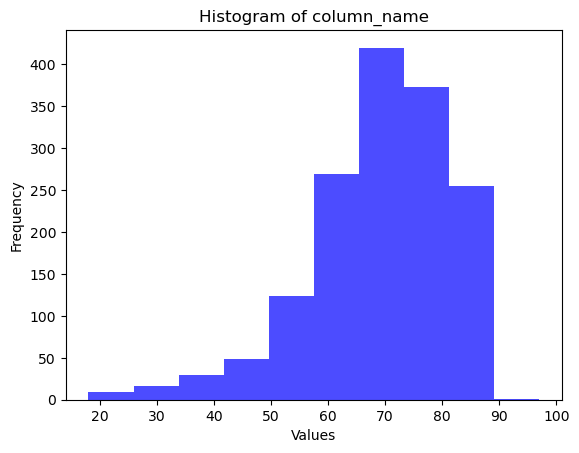

In [66]:
# Assuming 'column_name' is the name of the column you want to plot
plt.hist(prostate_cancer_required_columns_21['AGEP_A'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')
plt.show()


## Additional Task
* CREATE A REPO AND PUT YOUR CODE IN IT
* ADD YOUR DATA TO GITIGNORE

## CORRELATION TEST

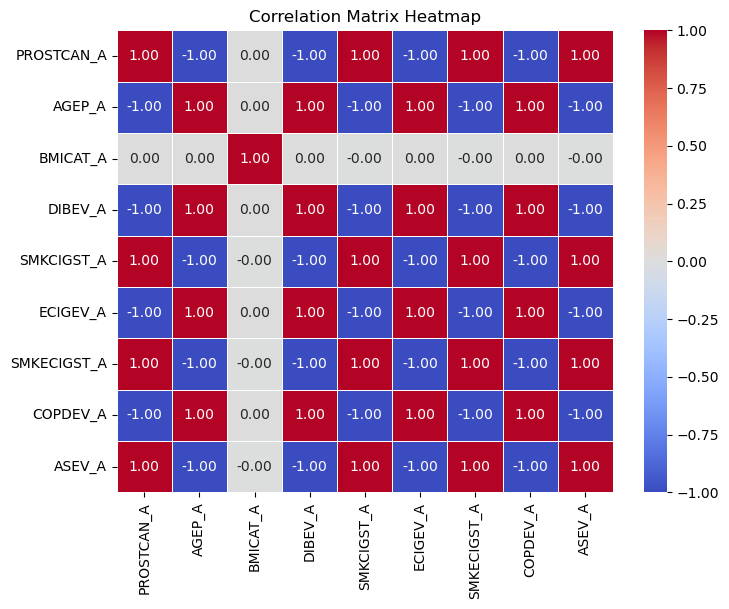

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Add this import statement

# Create a sample DataFrame or read your data from a CSV file
# Replace the following with your data or file path
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': [1, 2, 3, 4, 5],
    'AGEP_A': [5, 4, 3, 2, 1],
    'BMICAT_A': [2, 3, 2, 3, 2],
    'DIBEV_A': [5, 4, 3, 2, 1],
    'SMKCIGST_A': [1, 2, 3, 4, 5],
    'ECIGEV_A': [5, 4, 3, 2, 1],
    'SMKECIGST_A': [1, 2, 3, 4, 5],
    'COPDEV_A': [5, 4, 3, 2, 1],
    'ASEV_A': [1, 2, 3, 4, 5],
}

prostate_cancer_required_columns_21 = pd.DataFrame(prostate_cancer_required_columns_21)

# Calculate the correlation matrix
correlation_matrix = prostate_cancer_required_columns_21.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

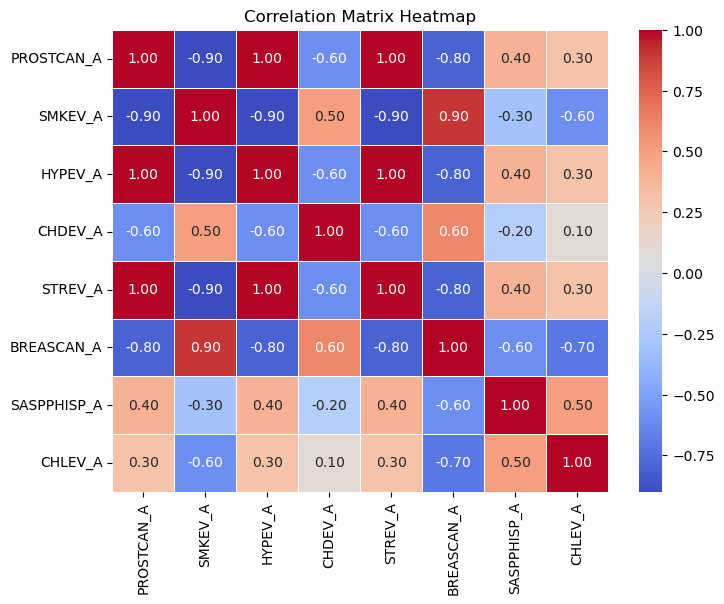

In [68]:
import pandas as pd
import numpy as np

# Create a sample DataFrame or read your data from a CSV file
# Replace the following with your data or file path
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': [1, 2, 3, 4, 5], 
    'SMKEV_A'  : [5,4,2,3,1],
    'HYPEV_A': [1,2,3,4,5],
    'CHDEV_A': [4,5,2,1,3],
    'STREV_A': [1,2,3,4,5],
    'BREASCAN_A': [4,5,2,3,1],
    'SASPPHISP_A': [4,1,2,3,5],
    'CHLEV_A': [3,2,4,1,5]
}

prostate_cancer_required_columns_21= pd.DataFrame(prostate_cancer_required_columns_21)

# Calculate the correlation matrix
correlation_matrix = prostate_cancer_required_columns_21.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


## TO DO

# check other variables

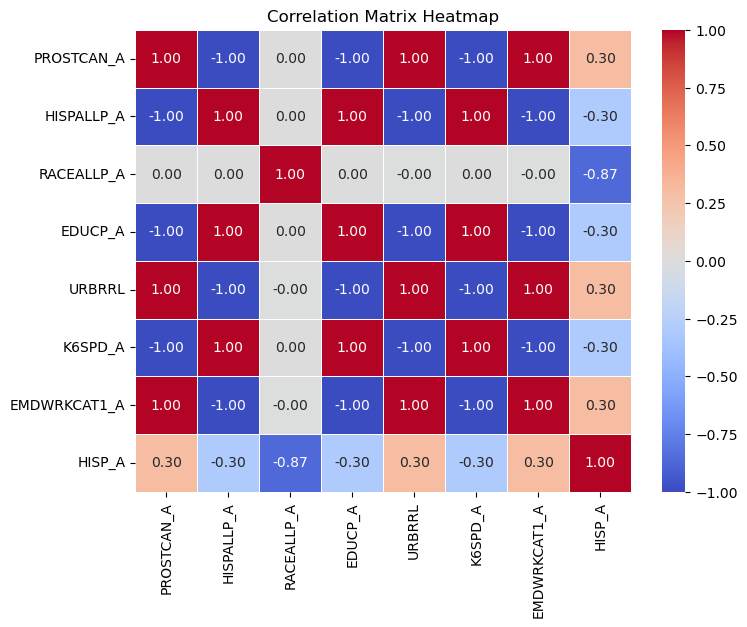

In [69]:
import pandas as pd
import numpy as np

# Create a sample DataFrame or read your data from a CSV file
# Replace the following with your data or file path
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': [1, 2, 3, 4, 5],
    'HISPALLP_A': [5, 4, 3, 2, 1],
    'RACEALLP_A': [2, 3, 2, 3, 2],
    'EDUCP_A': [5,4,3,2,1],
    'URBRRL': [1,2,3,4,5],
    'K6SPD_A': [5,4,3,2,1],
    'EMDWRKCAT1_A': [1,2,3,4,5],
    'HISP_A': [3,2,4,1,5]
}

prostate_cancer_required_columns_21= pd.DataFrame(prostate_cancer_required_columns_21)

# Calculate the correlation matrix
correlation_matrix = prostate_cancer_required_columns_21.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


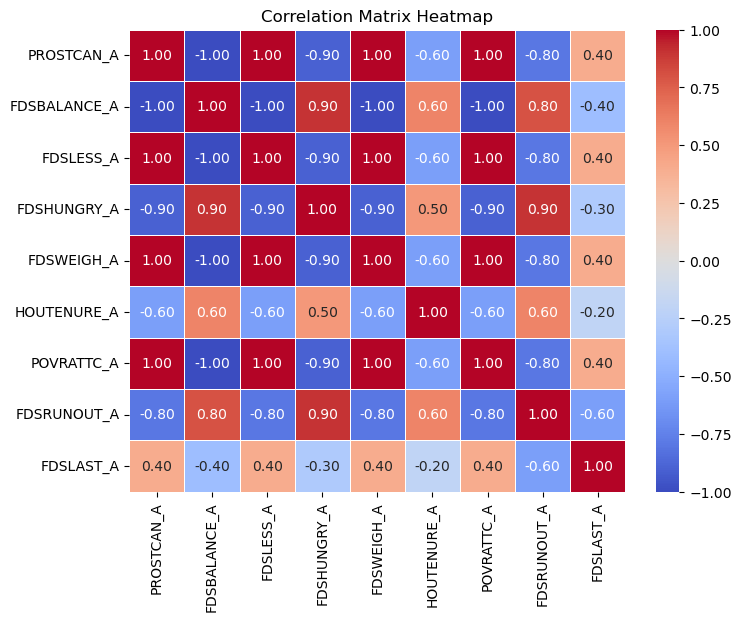

In [70]:
import pandas as pd
import numpy as np

# Create a sample DataFrame or read your data from a CSV file
# Replace the following with your data or file path
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': [1, 2, 3, 4, 5],
    'FDSBALANCE_A': [5,4,3,2,1],
    'FDSLESS_A': [1,2,3,4,5],
    'FDSHUNGRY_A'  : [5,4,2,3,1],
    'FDSWEIGH_A': [1,2,3,4,5],
    'HOUTENURE_A': [4,5,2,1,3],
    'POVRATTC_A': [1,2,3,4,5],
    'FDSRUNOUT_A': [4,5,2,3,1],
    'FDSLAST_A': [4,1,2,3,5],
    

In [75]:
from scipy.stats import chi2_contingency

In [100]:
# Example data (replace this with your actual data)
prostate_cancer_required_columns_21 = {
    'HISP_A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'PROSTCAN_A': [30, 45, 50, 35, 40]
}

prostate_cancer_required_columns_21 = pd.DataFrame(prostate_cancer_required_columns_21)

# Create a contingency table
contingency_table = pd.crosstab(prostate_cancer_required_columns_21['HISP_A'], prostate_cancer_required_columns_21['PROSTCAN_A'])

# Apply the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 5.0
P-value: 0.2872974951836458


In [101]:
# Example data (replace this with your actual data)
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'ECIGEV_A': [30, 45, 50, 35, 40]
}

prostate_cancer_required_columns_21 = pd.DataFrame(prostate_cancer_required_columns_21)

# Create a contingency table
contingency_table = pd.crosstab(prostate_cancer_required_columns_21['PROSTCAN_A'], prostate_cancer_required_columns_21['ECIGEV_A'])

# Apply the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 5.0
P-value: 0.2872974951836458


In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example data (replace this with your actual data)
prostate_cancer_required_columns_21 = {
    'PROSTCAN_A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'SASPPHISP_A': [30, 45, 50, 35, 40]
}

prostate_cancer_required_columns_21 = pd.DataFrame(prostate_cancer_required_columns_21)

# Create a contingency table
contingency_table = pd.crosstab(prostate_cancer_required_columns_21['PROSTCAN_A'], prostate_cancer_required_columns_21['SASPPHISP_A'])

# Apply the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 5.0
P-value: 0.2872974951836458
